In [1]:
import json
import pandas as pd
import re

In [2]:
with open("text_all_merged.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data["reviews"])

In [3]:
df.head()

,id,text
0,neg_0,Story of a man who has unnatural feelings for ...
1,neg_1,Robert DeNiro plays the most unbelievably inte...
2,neg_2,"I saw the capsule comment said ""great acting.""..."
3,neg_3,If I had not read Pat Barker's 'Union Street' ...
4,neg_4,This fanciful horror flick has Vincent Price p...


In [5]:
df["word_count"] = df["text"].apply(lambda x: len(x.split()))
df["char_count"] = df["text"].apply(len)

print(df["word_count"].describe())
print(df["char_count"].describe())


count    1202.000000
mean      221.424293
std       169.669762
min        11.000000
25%       124.000000
50%       163.000000
75%       263.750000
max      1014.000000
Name: word_count, dtype: float64
count    1202.000000
mean     1254.619800
std       979.641094
min        65.000000
25%       694.000000
50%       913.500000
75%      1515.250000
max      6103.000000
Name: char_count, dtype: float64


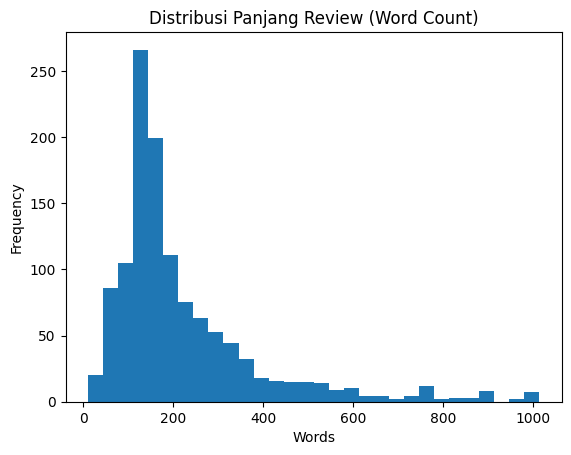

In [6]:
import matplotlib.pyplot as plt

plt.hist(df["word_count"], bins=30)
plt.title("Distribusi Panjang Review (Word Count)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [7]:
from collections import Counter
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

all_words = " ".join(df["text"]).lower().split()
word_freq = Counter(all_words)

word_freq.most_common(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('the', 14621),
 ('and', 7366),
 ('a', 7202),
 ('of', 6587),
 ('to', 5998),
 ('is', 4816),
 ('in', 4399),
 ('i', 3220),
 ('this', 3192),
 ('it', 3038),
 ('that', 2953),
 ('/><br', 2387),
 ('was', 2197),
 ('as', 2032),
 ('for', 1982),
 ('with', 1860),
 ('but', 1763),
 ('on', 1448),
 ('are', 1389),
 ('movie', 1299)]

In [8]:
meaningful_words = [w for w in all_words if w not in stop and w.isalpha()]
word_freq_clean = Counter(meaningful_words)

word_freq_clean.most_common(20)


[('movie', 1299),
 ('film', 1273),
 ('one', 1047),
 ('like', 831),
 ('even', 558),
 ('would', 553),
 ('good', 531),
 ('see', 479),
 ('really', 467),
 ('story', 466),
 ('first', 404),
 ('get', 388),
 ('much', 388),
 ('time', 374),
 ('could', 364),
 ('also', 358),
 ('made', 349),
 ('people', 343),
 ('great', 342),
 ('two', 317)]

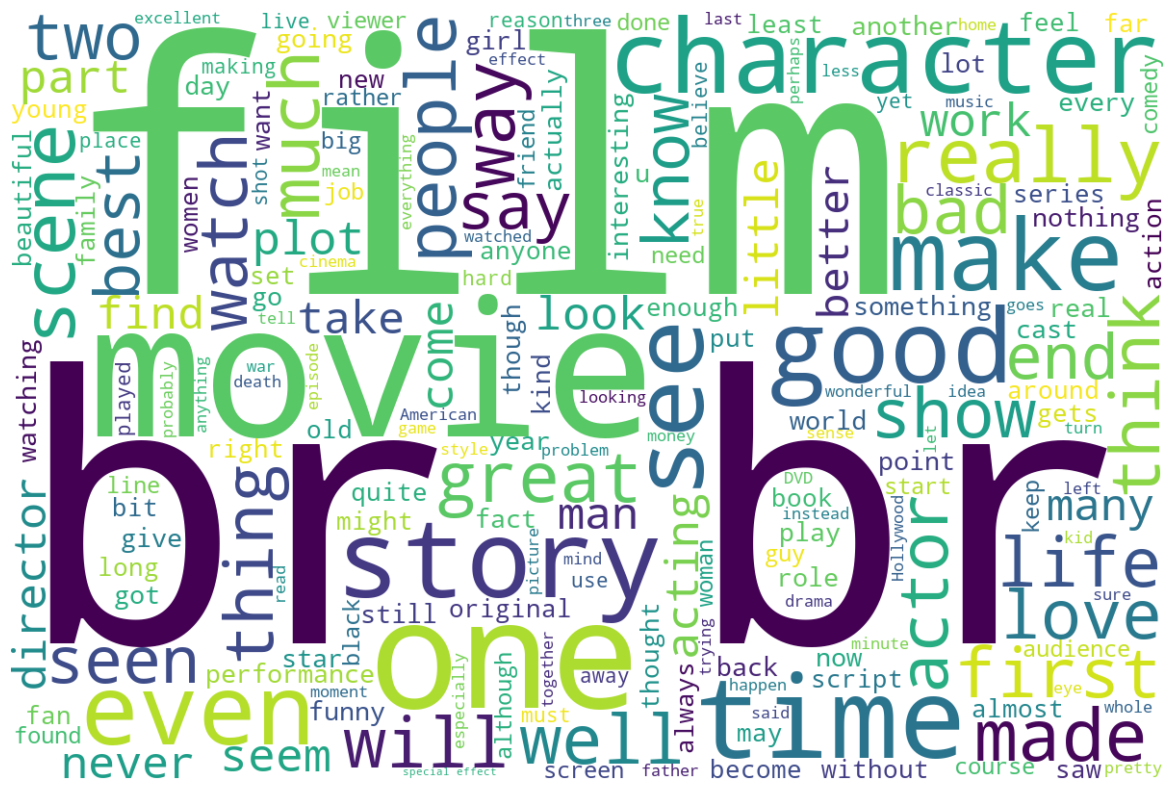

In [9]:
from wordcloud import WordCloud

wc = WordCloud(width=1200, height=800, background_color="white").generate(" ".join(df["text"]))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# Preprocessing